#### Importing and preprocessing the data

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pyfume.Clustering import Clusterer
from pyfume.EstimateAntecendentSet import AntecedentEstimator
from pyfume.EstimateConsequentParameters import ConsequentEstimator
from pyfume.SimpfulModelBuilder import SugenoFISBuilder
from pyfume.Tester import SugenoFISTester
from pandas import read_csv 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, explained_variance_score
import matplotlib.pyplot as plt

data = pd.read_csv('hairdryer.csv',header=None)
indexes = ['Voltage', 'Temperature']
data.columns = indexes
indexes = indexes[:-1]

In [14]:
data.head()

Voltage  Temperature
0     6.41       4.7661
1     3.41       4.7637
2     6.41       4.8394
3     6.41       5.0030
4     6.41       5.0176

In [15]:
data.describe()

Voltage  Temperature
count  1000.000000  1000.000000
mean      5.000000     4.890095
std       1.498047     0.829806
min       3.410000     3.200800
25%       3.410000     4.205675
50%       6.410000     4.937050
75%       6.410000     5.652500
max       6.410000     6.250800

In [16]:
data.dtypes == float

Voltage        True
Temperature    True
dtype: bool

In [17]:
data.isnull().sum()

Voltage        0
Temperature    0
dtype: int64

In [18]:
data_x = data.drop('Temperature', axis = 1)
data_y = data.Temperature

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state=21)

data_x.shape
data_y.shape

(1000,)

In [19]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.array
y_test = y_test.array

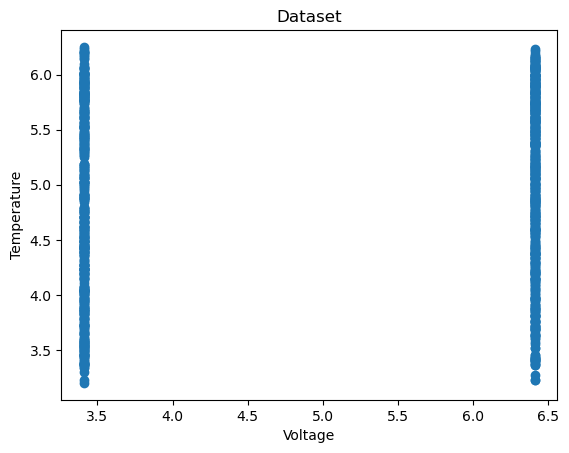

In [20]:
plt.scatter(data_x, data_y)
plt.xlabel('Voltage')  
plt.ylabel('Temperature')  
plt.title('Dataset')  
plt.show()

#### Building the model

In [21]:
best_mse = float('inf')
best_mape = float('inf')
best_exp_var = -float('inf')
best_nr_clus = 0

for nr_clus in range(2, 20):
    cl = Clusterer(x_train=x_train, y_train=y_train, nr_clus=nr_clus)
    
    clust_centers, part_matrix, _ = cl.cluster(method='fcm')
    
    ae = AntecedentEstimator(x_train, part_matrix)
    antecedent_params = ae.determineMF()
    
    ce = ConsequentEstimator(x_train, y_train, part_matrix)
    conseq_params = ce.suglms()
    
    # Build first-order Takagi-Sugeno model
    modbuilder = SugenoFISBuilder(antecedent_params, conseq_params, indexes, save_simpful_code=False)
    model = modbuilder.get_model()
    
    # Get model predictions
    modtester = SugenoFISTester(model, x_test, indexes)
    y_pred = modtester.predict()[0]
    
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    exp_var = explained_variance_score(y_test, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_nr_clus_mse = nr_clus

    if mape < best_mape:
        best_mape = mape
        best_nr_clus_mape = nr_clus

    if exp_var > best_exp_var:
        best_exp_var = exp_var
        best_nr_clus_exp_var = nr_clus

print("Best Results:")
print(f"Best Mean Squared Error: {best_mse} (Cluster Count: {best_nr_clus_mse})")
print(f"Best Mean Absolute Percentage Error: {best_mape * 100:.1f}% (Cluster Count: {best_nr_clus_mape})")
print(f"Best Explained Variance Score: {best_exp_var} (Cluster Count: {best_nr_clus_exp_var})")


 * Detected 2 rules / clusters
 * Detected Sugeno model type
 * Detected 3 rules / clusters
 * Detected Sugeno model type
 * Detected 4 rules / clusters
 * Detected Sugeno model type
 * Detected 5 rules / clusters
 * Detected Sugeno model type
 * Detected 6 rules / clusters
 * Detected Sugeno model type
 * Detected 7 rules / clusters
 * Detected Sugeno model type
 * Detected 8 rules / clusters
 * Detected Sugeno model type
 * Detected 9 rules / clusters
 * Detected Sugeno model type
 * Detected 10 rules / clusters
 * Detected Sugeno model type
 * Detected 11 rules / clusters
 * Detected Sugeno model type
 * Detected 12 rules / clusters
 * Detected Sugeno model type
 * Detected 13 rules / clusters
 * Detected Sugeno model type
 * Detected 14 rules / clusters
 * Detected Sugeno model type
 * Detected 15 rules / clusters
 * Detected Sugeno model type
 * Detected 16 rules / clusters
 * Detected Sugeno model type
 * Detected 17 rules / clusters
 * Detected Sugeno model type
 * Detected 18 r

-FCM vs GZ method-

In [22]:
best_mse = float('inf')
best_mape = float('inf')
best_exp_var = -float('inf')
best_nr_clus = 0

for nr_clus in range(2, 20):
    cl = Clusterer(x_train=x_train, y_train=y_train, nr_clus=nr_clus)
    
    clust_centers, part_matrix, _ = cl.cluster(method='gk')
    
    ae = AntecedentEstimator(x_train, part_matrix)
    antecedent_params = ae.determineMF()
    
    ce = ConsequentEstimator(x_train, y_train, part_matrix)
    conseq_params = ce.suglms()
    
    # Build first-order Takagi-Sugeno model
    modbuilder = SugenoFISBuilder(antecedent_params, conseq_params, indexes, save_simpful_code=False)
    model = modbuilder.get_model()
    
    # Get model predictions
    modtester = SugenoFISTester(model, x_test, indexes)
    y_pred = modtester.predict()[0]
    
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    exp_var = explained_variance_score(y_test, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_nr_clus_mse = nr_clus

    if mape < best_mape:
        best_mape = mape
        best_nr_clus_mape = nr_clus

    if exp_var > best_exp_var:
        best_exp_var = exp_var
        best_nr_clus_exp_var = nr_clus

print("Best Results:")
print(f"Best Mean Squared Error: {best_mse} (Cluster Count: {best_nr_clus_mse})")
print(f"Best Mean Absolute Percentage Error: {best_mape * 100:.1f}% (Cluster Count: {best_nr_clus_mape})")
print(f"Best Explained Variance Score: {best_exp_var} (Cluster Count: {best_nr_clus_exp_var})")


 * Detected 2 rules / clusters
 * Detected Sugeno model type
 * Detected 3 rules / clusters
 * Detected Sugeno model type
 * Detected 4 rules / clusters
 * Detected Sugeno model type
 * Detected 5 rules / clusters
 * Detected Sugeno model type
 * Detected 6 rules / clusters
 * Detected Sugeno model type
 * Detected 7 rules / clusters
 * Detected Sugeno model type
 * Detected 8 rules / clusters
 * Detected Sugeno model type
 * Detected 9 rules / clusters
 * Detected Sugeno model type
 * Detected 10 rules / clusters
 * Detected Sugeno model type
 * Detected 11 rules / clusters
 * Detected Sugeno model type
 * Detected 12 rules / clusters
 * Detected Sugeno model type
 * Detected 13 rules / clusters
 * Detected Sugeno model type
 * Detected 14 rules / clusters
 * Detected Sugeno model type
 * Detected 15 rules / clusters
 * Detected Sugeno model type
 * Detected 16 rules / clusters
 * Detected Sugeno model type
 * Detected 17 rules / clusters
 * Detected Sugeno model type
 * Detected 18 r